#Instalaciones

In [ ]:
!pip3 install python-igraph

#Zona para importaciones

In [13]:
import networkx as nx
import matplotlib.pyplot as plt

from os import scandir, getcwd

import community
import itertools

import igraph as ig
import operator

#Creacion de grafos

In [4]:
G_google = nx.read_weighted_edgelist('/content/authors_titles_google.csv',delimiter=',')
G_facebook = nx.read_weighted_edgelist('/content/authors_titles_facebook.csv',delimiter=',') 
G_carnegi = nx.read_weighted_edgelist('/content/authors_titles_Massachusetts Institute of Technology.csv',delimiter=',')
G_mit = nx.read_weighted_edgelist('/content/authors_titles_Carnegie Mellon University.csv',delimiter=',')
G_illinois = nx.read_weighted_edgelist('/content/authors_titles_Univ. of Illinois at Urbana-Champaign.csv',delimiter=',')
G_microsoft = nx.read_weighted_edgelist('/content/authors_titles_microsoft.csv',delimiter=',')

FileNotFoundError: [Errno 2] No such file or directory: '/content/authors_titles_google.csv'

# Setear Grafos



In [5]:
def ls(ruta = getcwd()):
    return [arch.name for arch in scandir(ruta) if arch.is_file()]

def load_networks(path):
    files = ls(path)
    graphs = {}
    full = nx.Graph()
    coauthors_full = set() 

    for file in files:
        name = file.split('_')[-1].split('.')[0]
        g = nx.read_weighted_edgelist(path+'/'+file, delimiter=',')        
        coauthors = set()
        full = nx.compose(full, g)
        with open(path+'/'+file) as f:
            lines = f.readlines()
            for line in lines:
                author = line.split(',')[0]
                coauthors.add(author)
                coauthors_full.add(author)
            g = g.subgraph(coauthors)            
        graphs[name] = g   
        
       
    '''
    for _, graph in graphs.items():
        for coauthor in graph.nodes():
            coauthors.add(coauthor) 
    
    full_filtred = full.subgraph(list(coauthors_full))
        
    graphs['Todas'] = full_filtred
    '''
    graphs['full']=full.subgraph(list(coauthors_full))
    return graphs


In [6]:
def compare_comunity(comu,authors):
  total = len(comu)
  if total > 0:
    common = set(comu) & set(authors)
    return len(common) *100 /total 
  else:
    return 0


#Cargo grafos

In [9]:
#path ='/content/'
path='../graph'
graphs = load_networks(path)
#print(graphs.keys())
#print(graphs['Univ'].nodes())
#/content/authors_titles_Univ. of Illinois at Urbana-Champaign.csv

# Extraigo comunidades

In [10]:
largest_cc = max(nx.connected_components(graphs['full']), key=len)
g = graphs['full'].subgraph(largest_cc)

In [11]:


k = 5
gn=[]
comp = nx.algorithms.community.centrality.girvan_newman(g)
for communities in itertools.islice(comp, k):
    gn.append(tuple(sorted(c) for c in communities))

comunnities_gn={}
for index,authors in enumerate(gn[len(gn)-1]):
  comunnities_gn[index]=authors

In [14]:
louvain={}
part = community.best_partition(g,weight='weight',resolution=1)

val = set(part.values())
print(len(val))

for v in val:
  louvain[v]=[]

for key,values in part.items():
  louvain[values].append(key)

AttributeError: module 'community' has no attribute 'best_partition'

In [ ]:
nx.write_gml(g, "/content/full.gml")

In [ ]:
G = ig.read('/content/full.gml')
C = G.community_infomap(trials=100 ,edge_weights='weight')


usuarios_comm = [G.vs[c]['label'] for c in C]
print (len(usuarios_comm))

infomap={}

for index,com in enumerate(usuarios_comm):
  infomap[index]=com

#print(infomap)

195
{0: ['Khe_Chai_Sim', 'David_B._Kemp', 'Fergus_Henderson', 'Meire_Fortunato', 'Pedro_J._Moreno', 'Hank_Liao', 'Kanishka_Rao', 'Melvin_Johnson', 'Navdeep_Jaitly', 'Parisa_Haghani', 'Siyang_Qin', 'Orhan_Firat', 'Fadi_Biadsy', 'George_Foster', 'Yu_Zhang', 'Leif_Johnson', 'Eric_Battenberg', 'Rohan_Anil', 'Jonathan_Shen', 'Arnaud_Sahuguet', 'Pete_Warden', 'Andrew_W._Senior', 'Suyog_Gupta', 'Heiga_Zen', 'Quan_Wang', 'Ananya_Misra', 'Ben_Laurie', 'Oriol_Vinyals', 'Yangqing_Jia', 'Olivier_Siohan', 'Alex_Rudnick', 'Mohamed_G._Elfeky', 'Austin_Waters', 'Tom_Bagby', 'Markus_Becker', 'Chanwoo_Kim', 'Zhifeng_Chen', 'Yanping_Huang', 'Vincent_Wan', 'Rob_Clark', 'Ying_Xiao', 'Erik_McDermott', 'Rohit_Prabhavalkar', 'Josh_Levenberg', 'Ruoming_Pang', 'Craig_Citro', 'William_Chan', 'Akosua_Busia', 'Benjamin_N._Lee', 'Daisy_Stanton'], 1: ['Dravyansh_Sharma', 'Nebojsa_Jojic', 'Mary_Czerwinski', 'Debadeepta_Dey', 'Ashish_Kapoor', 'John_C._Tang', 'Nathalie_Henry_Riche', 'Tulasi_Menon', 'Daniel_J._McDuff', 


#comparar deteccion

In [ ]:
result={}
result['google']=[]
result['Massachusetts Institute of Technology']=[]
result['microsoft']=[]
result['facebook']=[]
result['Carnegie Mellon University']=[]
result['Univ']=[]
for i in range(len(infomap)):
  compare={}
  compare['google']=compare_comunity(infomap[i],graphs['google'].nodes())
  compare['Massachusetts Institute of Technology']=compare_comunity(infomap[i],graphs['Massachusetts Institute of Technology'].nodes())
  compare['microsoft']=compare_comunity(infomap[i],graphs['microsoft'].nodes())
  compare['facebook']=compare_comunity(infomap[i],graphs['facebook'].nodes())
  compare['Carnegie Mellon University']=compare_comunity(infomap[i],graphs['Carnegie Mellon University'].nodes())
  compare['Univ']=compare_comunity(infomap[i],graphs['Univ'].nodes())
  maximo=max(compare.items(), key=operator.itemgetter(1))[0]

  result[maximo].extend(infomap[i])

for inst,authors in result.items():
  print(compare_comunity(authors,graphs[inst].nodes()),inst)


81.3157894736842 google
59.45945945945946 Massachusetts Institute of Technology
80.79625292740047 microsoft
75.60975609756098 facebook
73.4375 Carnegie Mellon University
59.45945945945946 Univ


In [ ]:
#print(c[5])


for i in range(len(communities)):
  print(compare_comunity(comunnities_gn[i],graphs['google'].nodes()),'Google','conmunidad',i)
  print(compare_comunity(comunnities_gn[i],graphs['Massachusetts Institute of Technology'].nodes()),'MIT','conmunidad',i)
  print(compare_comunity(comunnities_gn[i],graphs['microsoft'].nodes()),'Microsoft','conmunidad',i)
  print(compare_comunity(comunnities_gn[i],graphs['facebook'].nodes()),'Facebook','conmunidad',i)
  print(compare_comunity(comunnities_gn[i],graphs['Carnegie Mellon University'].nodes()),'Carnegie','conmunidad',i)
  print(compare_comunity(comunnities_gn[i],graphs['Univ'].nodes()),'Illinois','conmunidad',i)
  print('-----------------------------')



45.3227931488801 Google conmunidad 0
4.940711462450593 MIT conmunidad 0
27.733860342555996 Microsoft conmunidad 0
7.378129117259552 Facebook conmunidad 0
9.552042160737813 Carnegie conmunidad 0
5.533596837944664 Illinois conmunidad 0
-----------------------------
100.0 Google conmunidad 1
0.0 MIT conmunidad 1
0.0 Microsoft conmunidad 1
0.0 Facebook conmunidad 1
0.0 Carnegie conmunidad 1
0.0 Illinois conmunidad 1
-----------------------------
100.0 Google conmunidad 2
0.0 MIT conmunidad 2
0.0 Microsoft conmunidad 2
0.0 Facebook conmunidad 2
0.0 Carnegie conmunidad 2
0.0 Illinois conmunidad 2
-----------------------------
100.0 Google conmunidad 3
0.0 MIT conmunidad 3
0.0 Microsoft conmunidad 3
0.0 Facebook conmunidad 3
0.0 Carnegie conmunidad 3
0.0 Illinois conmunidad 3
-----------------------------
40.0 Google conmunidad 4
0.0 MIT conmunidad 4
60.0 Microsoft conmunidad 4
0.0 Facebook conmunidad 4
0.0 Carnegie conmunidad 4
0.0 Illinois conmunidad 4
-----------------------------


In [ ]:
result={}
result['google']=[]
result['Massachusetts Institute of Technology']=[]
result['microsoft']=[]
result['facebook']=[]
result['Carnegie Mellon University']=[]
result['Univ']=[]

for i in range(len(louvain)):
  compare={}
  compare['google']=compare_comunity(infomap[i],graphs['google'].nodes())
  compare['Massachusetts Institute of Technology']=compare_comunity(infomap[i],graphs['Massachusetts Institute of Technology'].nodes())
  compare['microsoft']=compare_comunity(infomap[i],graphs['microsoft'].nodes())
  compare['facebook']=compare_comunity(infomap[i],graphs['facebook'].nodes())
  compare['Carnegie Mellon University']=compare_comunity(infomap[i],graphs['Carnegie Mellon University'].nodes())
  compare['Univ']=compare_comunity(infomap[i],graphs['Univ'].nodes())
  maximo=max(compare.items(), key=operator.itemgetter(1))[0]

  result[maximo].extend(infomap[i])

for inst,authors in result.items():
  print(compare_comunity(authors,graphs[inst].nodes()),inst)
  
'''  
  print(compare_comunity(louvain[i],graphs['google.'].nodes()),'Google','conmunidad',i)
  print(compare_comunity(louvain[i],graphs['Massachusetts Institute of Technology.'].nodes()),'MIT','conmunidad',i)
  print(compare_comunity(louvain[i],graphs['microsoft.'].nodes()),'Microsoft','conmunidad',i)
  print(compare_comunity(louvain[i],graphs['facebook.'].nodes()),'Facebook','conmunidad',i)
  print(compare_comunity(louvain[i],graphs['Carnegie Mellon University.'].nodes()),'Carnegie','conmunidad',i)
  print(compare_comunity(louvain[i],graphs['Univ. of Illinois at Urbana-Champaign.'].nodes()),'Illinois','conmunidad',i)
  print('-----------------------------')
'''

77.29729729729729 google
62.5 Massachusetts Institute of Technology
81.65137614678899 microsoft
75.67567567567568 facebook
70.27027027027027 Carnegie Mellon University
53.333333333333336 Univ


"  \n  print(compare_comunity(louvain[i],graphs['google.'].nodes()),'Google','conmunidad',i)\n  print(compare_comunity(louvain[i],graphs['Massachusetts Institute of Technology.'].nodes()),'MIT','conmunidad',i)\n  print(compare_comunity(louvain[i],graphs['microsoft.'].nodes()),'Microsoft','conmunidad',i)\n  print(compare_comunity(louvain[i],graphs['facebook.'].nodes()),'Facebook','conmunidad',i)\n  print(compare_comunity(louvain[i],graphs['Carnegie Mellon University.'].nodes()),'Carnegie','conmunidad',i)\n  print(compare_comunity(louvain[i],graphs['Univ. of Illinois at Urbana-Champaign.'].nodes()),'Illinois','conmunidad',i)\n  print('-----------------------------')\n"

#Grafos dibujados

(51.0, 22.0, 19.0, 19.0, 18.0, 18.0, 16.0, 16.0, 16.0, 16.0, 15.0, 14.0, 14.0, 13.0, 12.0, 11.0, 11.0, 11.0, 11.0, 10.0, 10.0, 9.0, 9.0, 9.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 7.0, 7.0, 7.0, 7.0, 7.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0

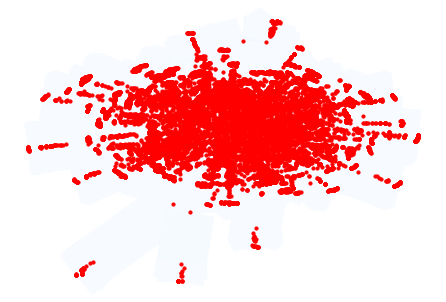

In [ ]:
edges,weights = zip(*nx.get_edge_attributes(G_carnegi,'weight').items())
pos = nx.spring_layout(G_carnegi)
print(weights)
#colors_edge = [e for e in G_google.edges.data('weight')]
nx.draw(G_carnegi,pos=pos,node_color='r',node_size=10, edgelist=edges, edge_color=weights, width=50.0, edge_cmap=plt.cm.Blues)

<generator object girvan_newman at 0x7f8a47757ba0>


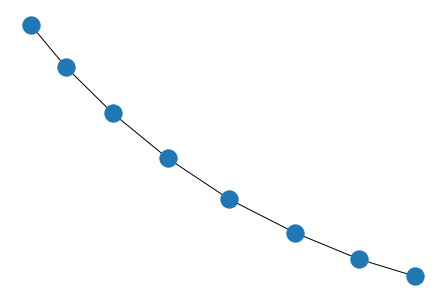

In [ ]:
import itertools
G = nx.path_graph(8)
nx.draw(G)
k = 4
comp = nx.algorithms.community.centrality.girvan_newman(G)
print(comp)


In [ ]:
!pip3 install python-louvain

In [ ]:

part = community.best_partition(G_carnegi)

for key,values in part.items():
  print(key,values)

In [ ]:
com=(community.best_partition(G_carnegi))
colors = list(com.values())
nodes = list(com.keys())
edges,weights = zip(*nx.get_edge_attributes(G_carnegi,'weight').items())
pos = nx.kamada_kawai_layout(G_carnegi)
#edges,weights = zip(*nx.get_edge_attributes(G_carnegi,'weight').items())

#community = parts.values
nx.draw(G_carnegi,pos=pos,nodelist=nodes,node_color=colors,node_size=20, edge_color=weights, width=50.0, edge_cmap=plt.cm.Blues)

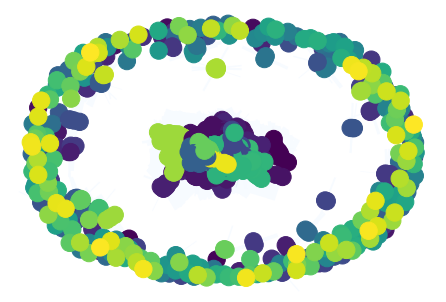

In [ ]:
com=(community.best_partition(graphs['full']))
colors = list(com.values())
nodes = list(com.keys())
edges,weights = zip(*nx.get_edge_attributes(graphs['full'],'weight').items())
pos = nx.spring_layout(graphs['full'])
#edges,weights = zip(*nx.get_edge_attributes(G_carnegi,'weight').items())
weights=[d*d for d in weights]
#community = parts.values
nx.draw(graphs['full'],pos=pos,nodelist=nodes,node_color=colors, edge_color=weights, width=50.0, edge_cmap=plt.cm.Blues)

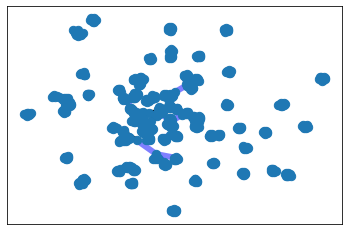

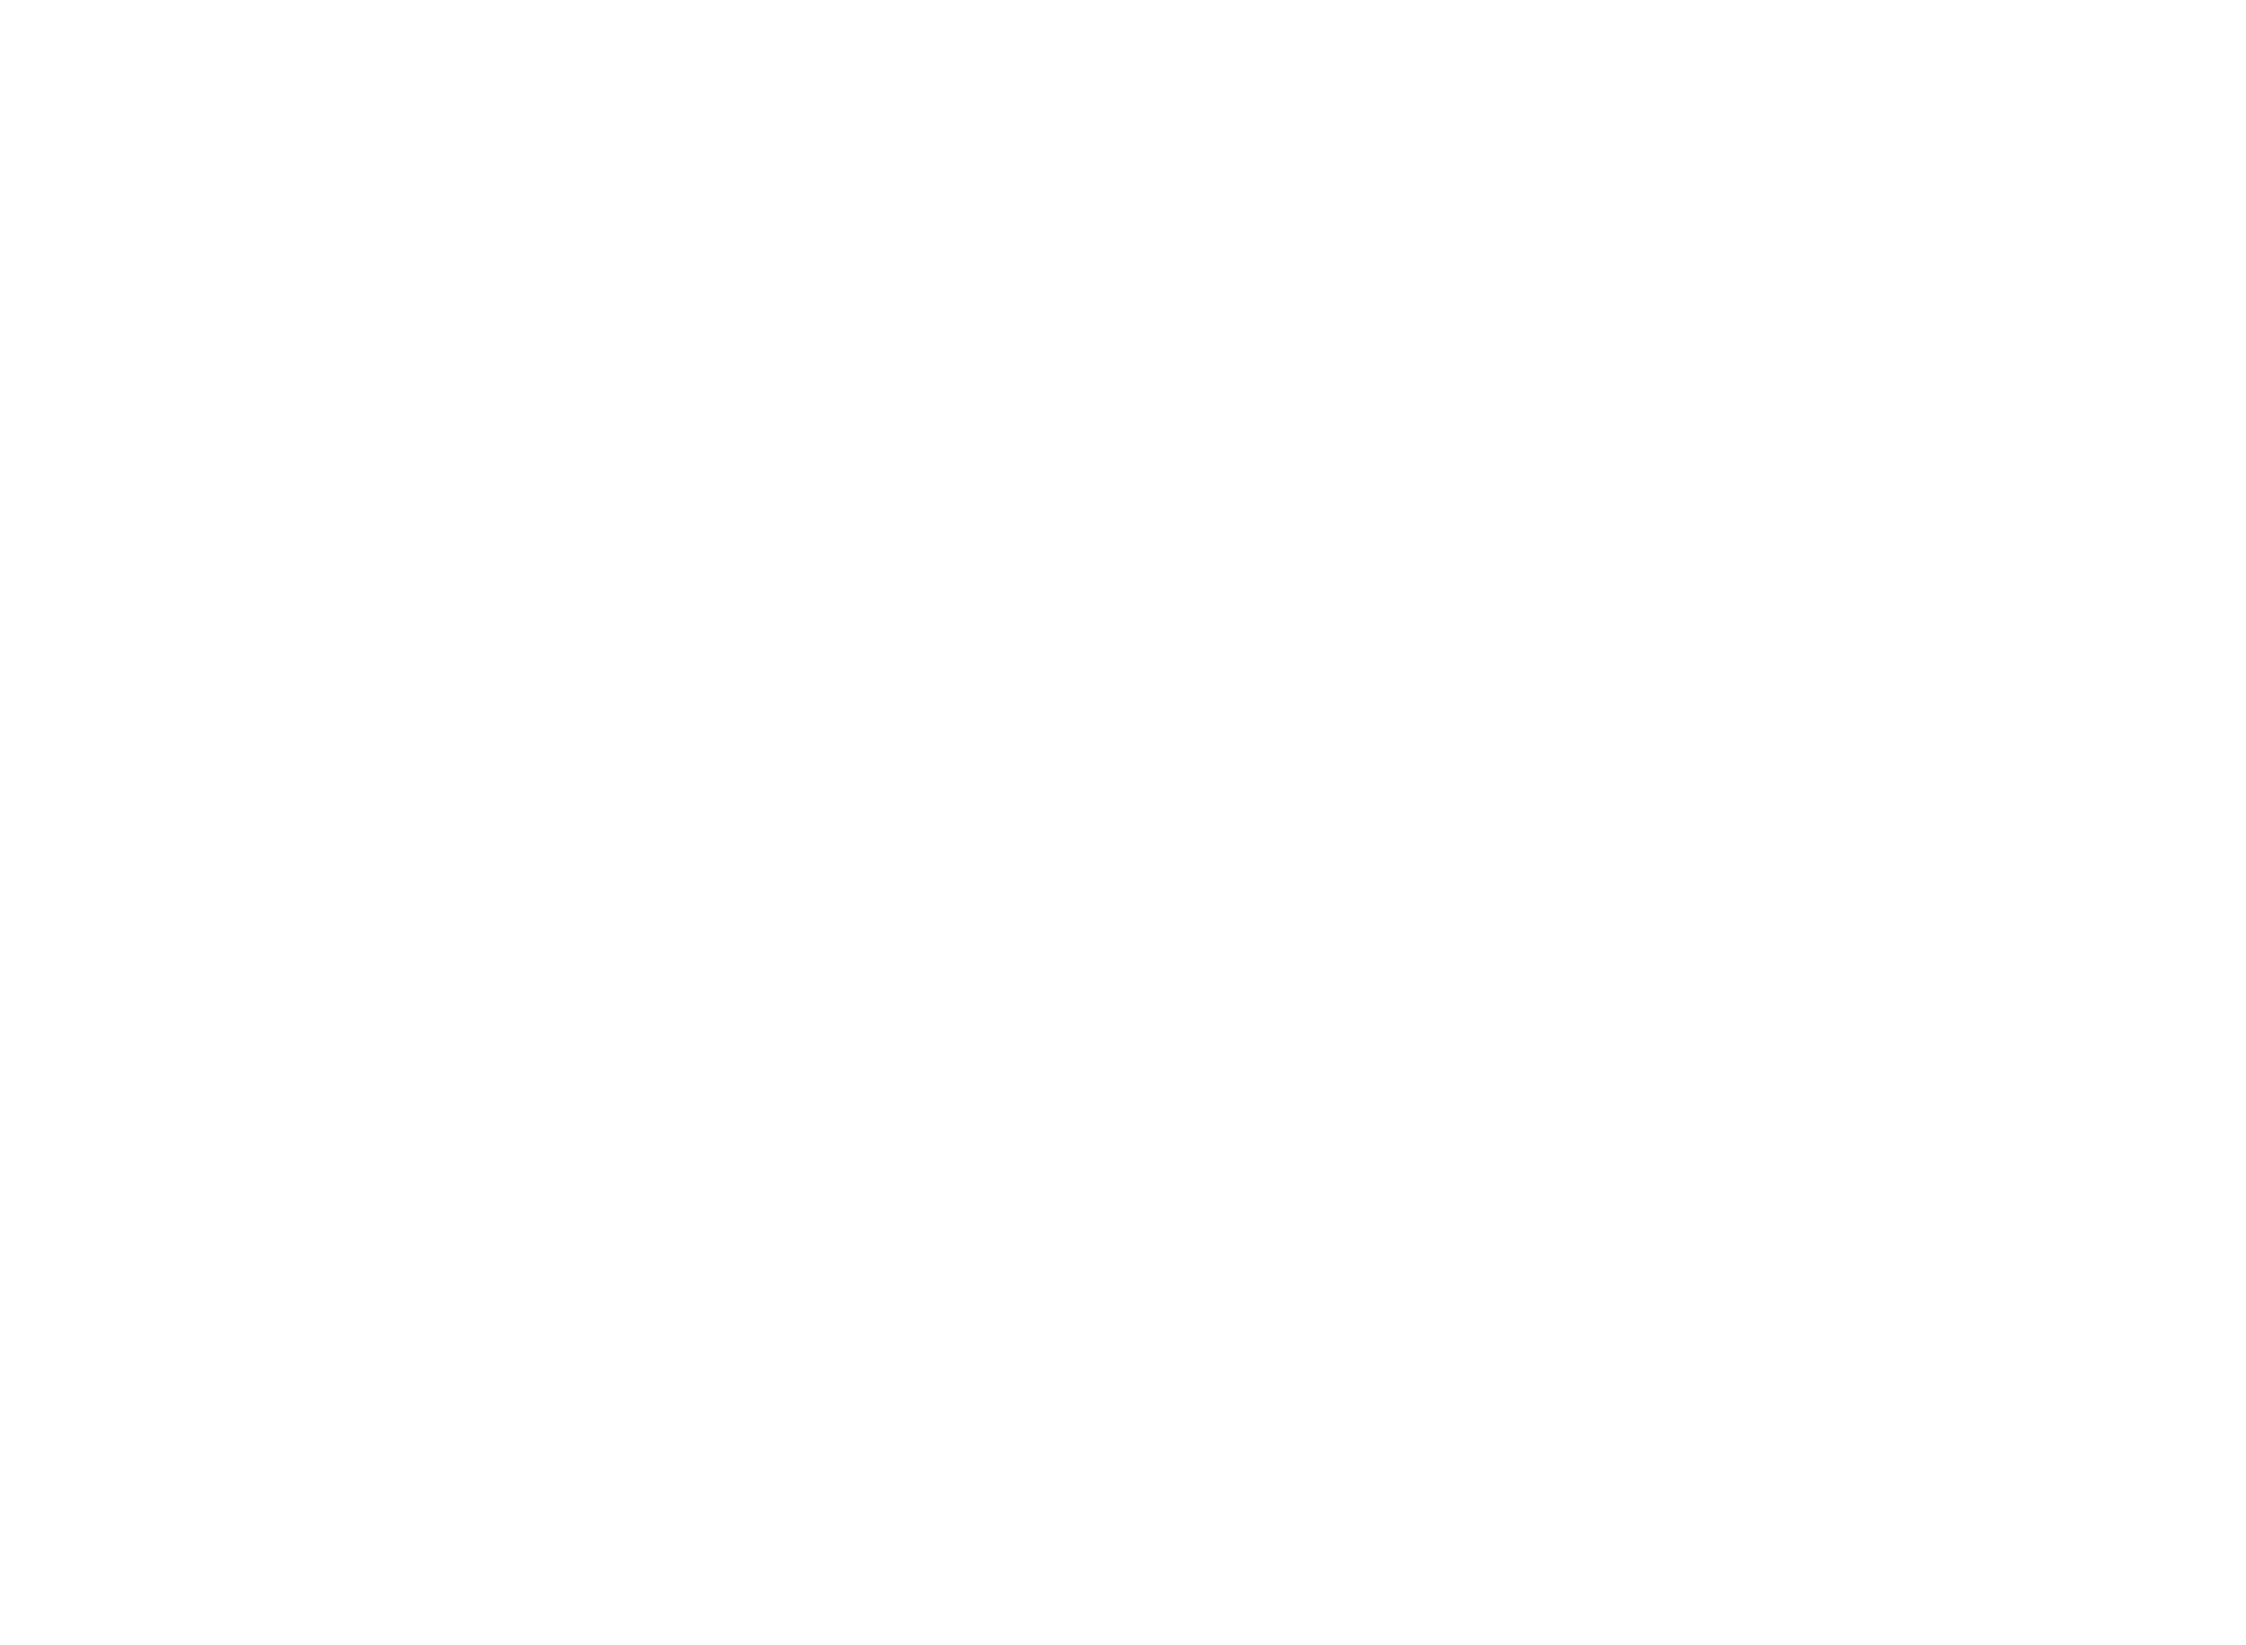

In [ ]:
import matplotlib.pyplot as plt
import networkx as nx

G = nx.read_weighted_edgelist('/content/authors_titles_Univ. of Illinois at Urbana-Champaign.csv',delimiter=',')



elarge = [(u, v) for (u, v, d) in G.edges(data=True) if d['weight'] > 10]
esmall = [(u, v) for (u, v, d) in G.edges(data=True) if d['weight'] <= 10]

pos = nx.spring_layout(G)  # positions for all nodes

# nodes
nx.draw_networkx_nodes(G, pos, node_size=70)

# edges
nx.draw_networkx_edges(G, pos, edgelist=elarge,
                       width=6)
nx.draw_networkx_edges(G, pos, edgelist=esmall,
                       width=6, alpha=0.5, edge_color='b', style='dashed')

# labels
plt.figure(3,figsize=(40,30))

plt.axis('off')
plt.show()